# Our Example: Classifying customers for car insurances

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import pandas as pd
print(pd.__version__)

0.23.1


In [5]:
import numpy as np
print(np.__version__)

1.14.5


## Step 1: Loading and exploring our data set
This is a database of customers of an insurance company. Each data point is one customer. The group represents the number of accidents the customer has been involved with in the past

* 0 - red: many accidents
* 1 - green: few or no accidents
* 2 - yellow: in the middle        

In [1]:
!curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/manning/data/insurance-customers-1500.csv

In [2]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

NameError: name 'pd' is not defined

In [5]:
df.describe()

,max speed,age,thousand miles per year,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.492667,44.952667,30.344000,0.998667
std,17.604333,17.191727,15.463152,0.816768
min,68.000000,9.000000,-21.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000
50%,120.000000,42.000000,29.000000,1.000000
75%,137.000000,55.000000,42.000000,2.000000
max,166.000000,102.000000,84.000000,2.000000


## Step 2: Disassemble and take a few samples so we do not overload the plot

In [6]:
sample_df = df.sample(n=300, random_state=42)

In [7]:
sample_y = sample_df['group']
sample_df.drop('group', axis='columns', inplace=True)

## Step 3: A pairplot gives you a nice overview of your data with just a few lines of code

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

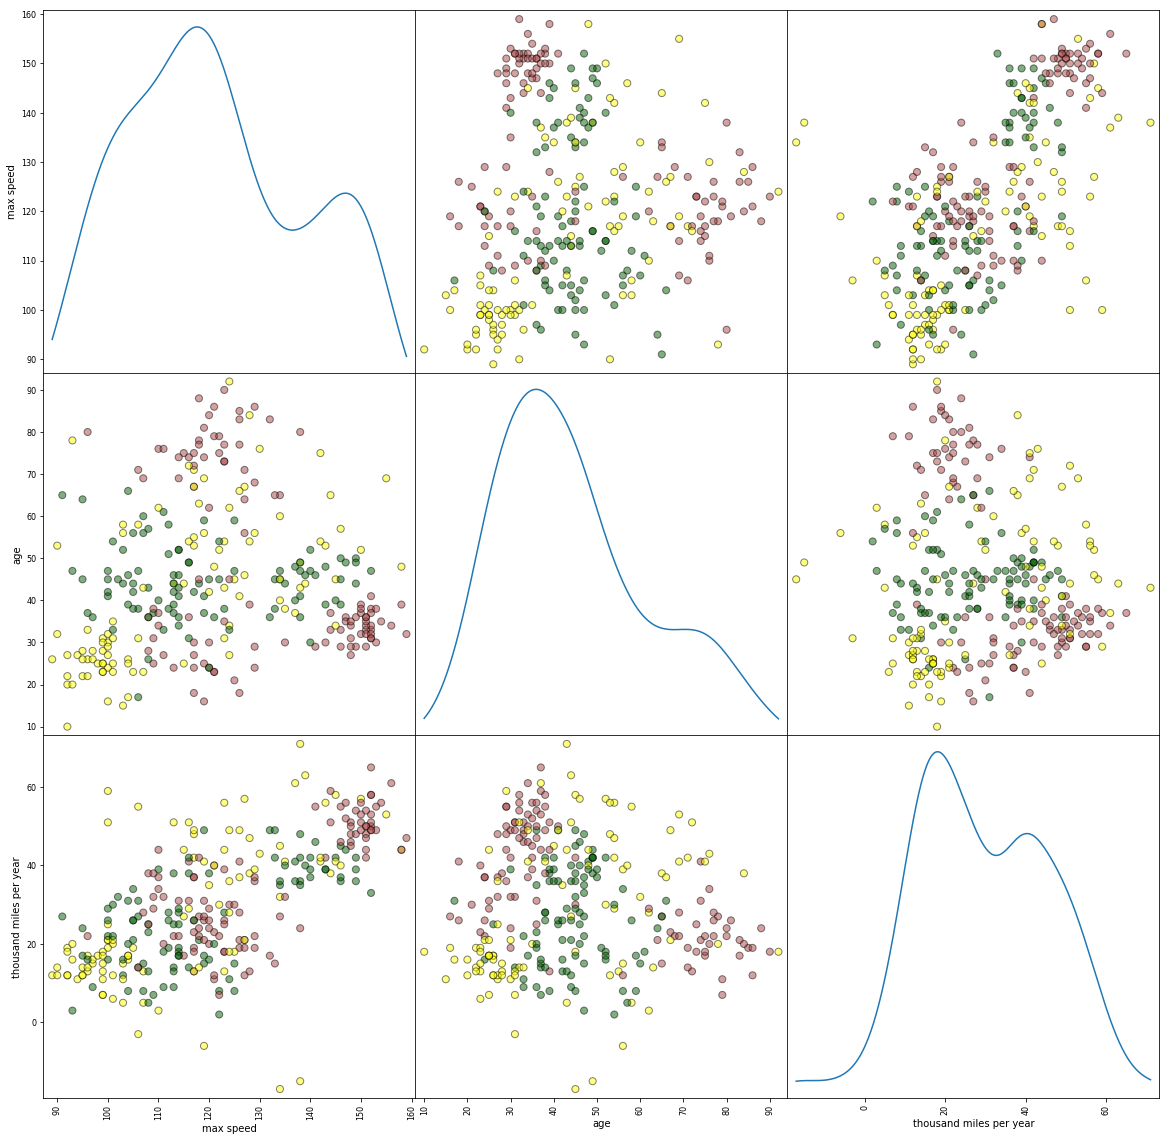

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.clf()
plt.figure(figsize=(20, 20))

CMAP = ListedColormap(['#AA4444', '#006000', '#FFFF00'])

pd.plotting.scatter_matrix(sample_df, c=sample_y, cmap=CMAP, s=200, edgecolor='black', figsize=(20, 20), diagonal='kde')
plt.show()
# plt.savefig('scatter-matrix.png')

## Step 4: Choose an intuitive view on your data - plot speed vs age only

In [9]:
# ignore this, it is just technical code to plot decision boundaries
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# http://jponttuset.cat/xkcd-deep-learning/

from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#EEEE44'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25
title_font_size=40

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                   mesh=True, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    fig, ax = plt.subplots(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    if print:
        ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=100, marker='o', edgecolors='k')
        
    ax.set_xlabel(x_label, fontsize=font_size)
    ax.set_ylabel(y_label, fontsize=font_size)
    ax.set_title(title, fontsize=title_font_size)
    if fname:
        fig.savefig('figures/'+fname)
        
def plot_keras_prediction(clf, x_data, y_data, x_label, y_label, ground_truth, title="", 
                          mesh=True, fixed=None, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    fig, ax = plt.subplots(figsize=(20,10))

    if clf and mesh:
        grid_X = np.array(np.c_[yy.ravel(), xx.ravel()])
        if fixed:
            fill_values = np.full((len(grid_X), 1), fixed)
            grid_X = np.append(grid_X, fill_values, axis=1)
        Z = clf.predict(grid_X)
        Z = np.argmax(Z, axis=1)
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
        
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    if print:
        ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        ax.scatter(x_data, y_data, c=ground_truth, cmap=cmap_bold, s=100, marker='o', edgecolors='k')
        
    ax.set_xlabel(x_label, fontsize=font_size)
    ax.set_ylabel(y_label, fontsize=font_size)
    ax.set_title(title, fontsize=title_font_size)
    if fname:
        fig.savefig('figures/'+fname)


In [10]:
sample_X = sample_df.as_matrix()
X_kmh_age = sample_X[:, :2]
X_2_dim = X_kmh_age

In [3]:
plotPrediction(None, X_2_dim[:, 1], X_2_dim[:, 0], 
               'Age', 'Max Speed', sample_y, mesh=False,
                title="Max Speed vs Age")
#                , fname='all.png')

NameError: name 'plotPrediction' is not defined